         Marriage_status  Married
0          never-married        0
1     married-civ-spouse        1
2               divorced        0
3     married-civ-spouse        1
4     married-civ-spouse        1
5     married-civ-spouse        1
6  married-spouse-absent        1
7     married-civ-spouse        1
8          never-married        0
9     married-civ-spouse        1


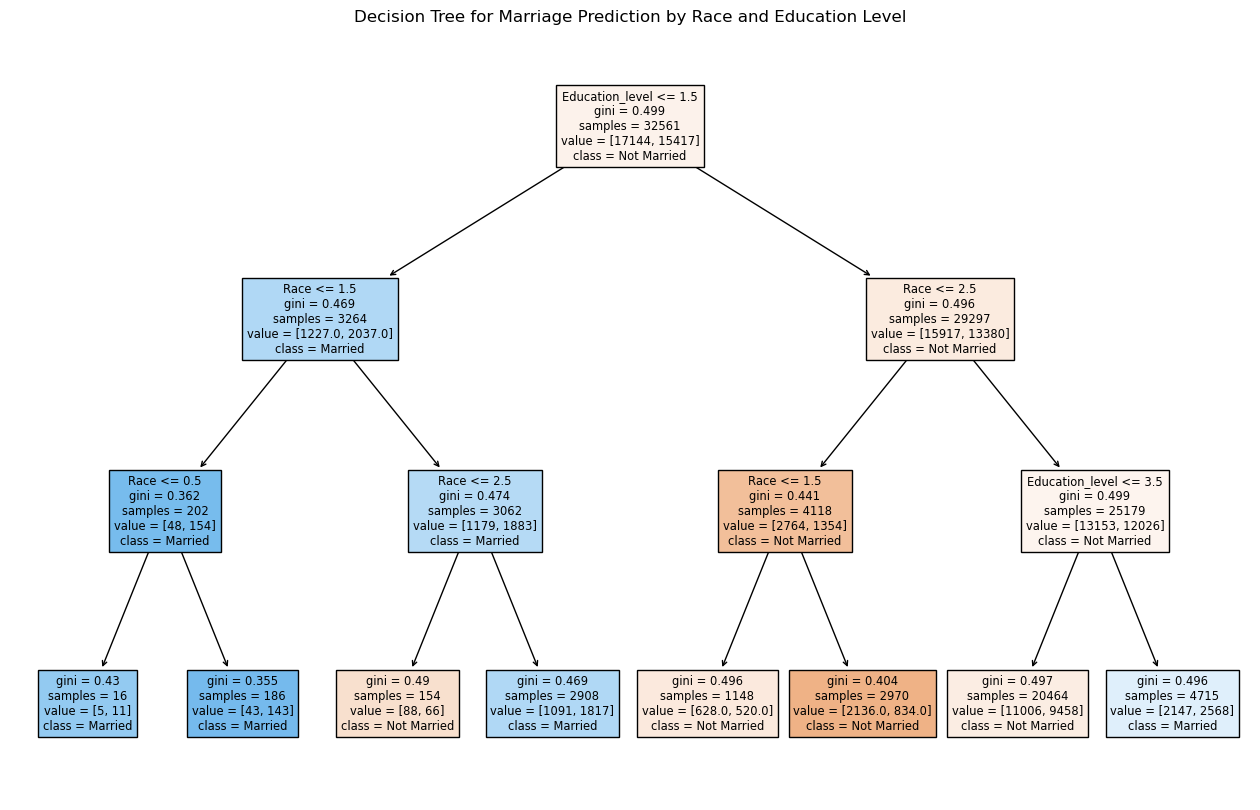

In [79]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r"C:\Users\marlo\OneDrive\Desktop\adult (1)\adult.datasetv3.csv")
df["Education_level"] = df["Education_level"].str.strip().str.lower()
# Define education level mapping to simplify categories
education_mapping = {
    "preschool": "primary education",
    "1st-4th": "primary education",
    "5th-6th": "primary education",
    "7th-8th": "secondary education",
    "9th": "secondary education",
    "10th": "secondary education",
    "11th": "secondary education",
    "12th": "secondary education",
    "hs-grad": "secondary education",
    "some-college": "some college",
    "assoc-acdm": "some college",
    "assoc-voc": "some college",
    "bachelors": "undergraduate degree",
    "masters": "postgraduate degree",
    "doctorate": "postgraduate degree",
    "prof-school": "postgraduate degree"
}


# Apply education level mapping and create a binary married column
df["Simplified_Education_level"] = df["Education_level"].map(education_mapping)

# Step 1: Standardize text by stripping whitespace and converting to lowercase
df["Marriage_status"] = df["Marriage_status"].str.strip().str.lower()

# Step 2: Define the married statuses, ensuring they match the standardized text
married_statuses = ["married-civ-spouse", "married-spouse-absent", "married-af-spouse"]

# Step 3: Apply the lambda function to classify 'Married' status
df["Married"] = df["Marriage_status"].apply(lambda x: 1 if x in married_statuses else 0)

# Step 4: Display a sample of the Marriage_status and Married columns to verify
print(df[["Marriage_status", "Married"]].head(10))

# Label encode education level and one-hot encode race for use in the decision tree
le_race = LabelEncoder()
le_education = LabelEncoder()
df["Race_encoded"] = le_race.fit_transform(df["Race"])
df["Education_encoded"] = le_education.fit_transform(df["Simplified_Education_level"])

# Define features and target
X = df[["Race_encoded", "Education_encoded"]]
y = df["Married"]

# Train a decision tree classifier
tree_model = DecisionTreeClassifier(max_depth = 3, random_state=42, )  # Limiting depth for interpretability
tree_model.fit(X, y)



# Plot the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    tree_model,
    feature_names=["Race", "Education_level"],
    class_names=["Not Married", "Married"],
    filled=True
)
plt.title("Decision Tree for Marriage Prediction by Race and Education Level")
plt.show()



In [41]:
print("Race distribution:\n", df["Race"].value_counts())
print("Education level distribution:\n", df["Simplified_Education_level"].value_counts())


Race distribution:
 Race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Education level distribution:
 Series([], Name: count, dtype: int64)


In [61]:
print(df["Simplified_Education_level"].head(50))


0     undergraduate degree
1     undergraduate degree
2      secondary education
3      secondary education
4     undergraduate degree
5      postgraduate degree
6      secondary education
7      secondary education
8      postgraduate degree
9     undergraduate degree
10            some college
11    undergraduate degree
12    undergraduate degree
13            some college
14            some college
15     secondary education
16     secondary education
17     secondary education
18     secondary education
19     postgraduate degree
20     postgraduate degree
21     secondary education
22     secondary education
23     secondary education
24     secondary education
25    undergraduate degree
26     secondary education
27            some college
28     secondary education
29     secondary education
30            some college
31            some college
32    undergraduate degree
33            some college
34            some college
35     secondary education
36            some college
3

In [71]:
print(dict(zip(le_education.classes_, le_education.transform(le_education.classes_))))

{'postgraduate degree': 0, 'primary education': 1, 'secondary education': 2, 'some college': 3, 'undergraduate degree': 4}


In [73]:
print(dict(zip(le_race.classes_, le_race.transform(le_race.classes_))))

{' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}


In [75]:
df

,Education_level,Marriage_status,Race,Simplified_Education_level,Married,Race_encoded,Education_encoded
0,bachelors,never-married,White,undergraduate degree,0,4,4
1,bachelors,married-civ-spouse,White,undergraduate degree,1,4,4
2,hs-grad,divorced,White,secondary education,0,4,2
3,11th,married-civ-spouse,Black,secondary education,1,2,2
4,bachelors,married-civ-spouse,Black,undergraduate degree,1,2,4
...,...,...,...,...,...,...,...
32556,assoc-acdm,married-civ-spouse,White,some college,1,4,3
32557,hs-grad,married-civ-spouse,White,secondary education,1,4,2
32558,hs-grad,widowed,White,secondary education,0,4,2
32559,hs-grad,never-married,White,secondary education,0,4,2
